### Import các thư viện cần thiết

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Đọc file .csv
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

In [3]:
# Xem số dòng, số cột
df.shape

(374, 13)

In [4]:
# Liệt kê tên của các cột có trong bộ dữ liệu
df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [5]:
# Xem 5 dòng bất kỳ của bộ dữ liệu
df.sample(5)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
273,274,Female,49,Nurse,6.2,6,90,8,Overweight,140/95,75,10000,Sleep Apnea
172,173,Male,41,Lawyer,7.7,8,90,5,Normal,130/85,70,8000,NaN
229,230,Male,44,Salesperson,6.3,6,45,7,Overweight,130/85,72,6000,Insomnia
157,158,Male,39,Lawyer,7.2,8,60,5,Normal,130/85,68,8000,NaN
113,114,Male,37,Lawyer,7.4,8,60,5,Normal,130/85,68,8000,NaN


In [6]:
# Hiển thị thông tin bộ dữ liệu hiện tại
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


Phân tích biến mục tiêu

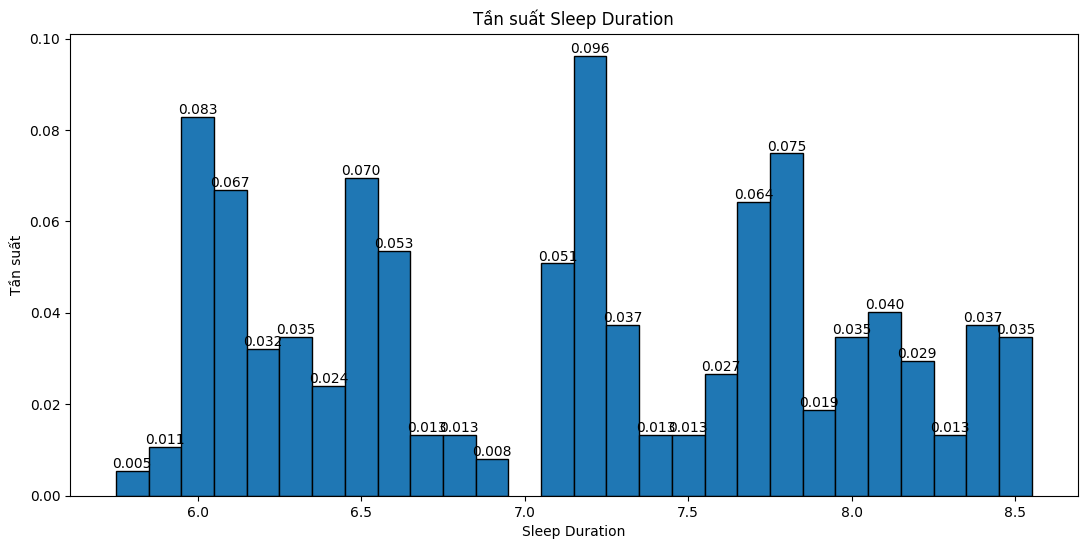

In [7]:
# Tính tần suất của từng giá trị
values, counts = np.unique(df["Sleep Duration"], return_counts=True)

# Tính tần suất (số lượng/tổng số)
frequencies = counts / len(df["Sleep Duration"])

plt.figure(figsize=(13, 6))

# Vẽ biểu đồ cột với các cột cách nhau ra
bars = plt.bar(values, frequencies, width=0.1, edgecolor='black', align='center')

# Thêm tiêu đề và nhãn
plt.title('Tần suất Sleep Duration')
plt.xlabel('Sleep Duration')
plt.ylabel('Tần suất')

for bar in bars:
    yval = bar.get_height()  
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.3f}', ha='center', va='bottom')

# Hiển thị biểu đồ
plt.show()

# 1. Data Cleaning

##  1.1.Xử lý giá trị bị khuyết


Theo mô tả của bộ dữ liệu, cột Sleep Disorder có các giá trị "None", "Insomnia" và "Sleep Apnea"
Tuy nhiên, khi đọc file CSV thì Pandas đã tự động chuyển các giá trị "None" thành NaN. Vì vậy cần thay thế
các giá trị NaN này lại bằng giá trị "None" với ý nghĩa là "Không có rối loạn giấc ngủ" 

In [8]:
# Thay thế các giá trị NaN trong cột Sleep Disorder bằng "None"
df.fillna({"Sleep Disorder": "None"}, inplace=True)

# Kiểm tra lại các giá trị khác biệt
unique_values = df['Sleep Disorder'].unique()
print(unique_values)


['None' 'Sleep Apnea' 'Insomnia']


In [9]:
# Xem lại giá trị sau khi chuyển đổi
df.head(5)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [10]:
# Kiểm tra các giá trị NaN
missing_data = df.isnull().sum()
print(missing_data)

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64


In [11]:
# Tách cột Blood Pressure thành 2 cột Systolic, Diastolic (Tâm trương, Tâm thu)
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True)

In [12]:
# Chuyển kiểu dữ liệu các cột mới tạo thành kiểu số nguyên để dễ phân tích
df['Systolic'] = pd.to_numeric(df['Systolic'], errors='coerce')
df['Diastolic'] = pd.to_numeric(df['Diastolic'], errors='coerce')

In [13]:
# Kiểm tra kiểu dữ liệu của các cột
df.dtypes

Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
Systolic                     int64
Diastolic                    int64
dtype: object

## 1.2. Xóa cột Person ID


- Vì cột Person ID chỉ dùng để đánh số thứ tự bản ghi và không có giá trị trong việc phân tích. Do vậy ta sẽ xóa cột này khỏi df.

In [14]:
df.drop(columns=['Person ID'], inplace=True)

## 1.3. Thay đổi giá trị Normal Weight thành Normal

In [15]:
df.replace({'BMI Category': {'Normal Weight': 'Normal'}}, inplace=True)

In [16]:
# Tiếp theo, ta sẽ phân loại ra cho chúng là các biến số và biến phân loại.
# Đồng thời, lưu lại tên của biến mục tiêu
target_col = 'Sleep Duration'
numeric_cols = [column for column in df.columns if df[column].dtype !=
                'object' and column != 'Sleep Duration']
categories_cols = [
    column for column in df.columns if column not in numeric_cols and column != 'Sleep Duration']

# 2. EDA

+ Thống kê mô tả cơ bản (mean, median, ..).
+ Phân tích phân bố của các biến (với histograms, boxplots).
+ Tìm hiểu mối quan hệ giữa các biến (correlation matrix, scatter plots).

In [17]:
# Tạo bảng thống kê tóm tắt về các biến số trong DataFrame bằng phương thức describe().
# Kết quả là một DataFrame với các chỉ số thống kê 
# như count, mean, std, min, 25%, 50%, 75%, và max.
# Chuyển vị DataFrame để hiển thị thông tin theo cột (biến số).
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,374.0,42.184492,8.673133,27.0,35.25,43.0,50.0,59.0
Sleep Duration,374.0,7.132086,0.795657,5.8,6.40,7.2,7.8,8.5
Quality of Sleep,374.0,7.312834,1.196956,4.0,6.00,7.0,8.0,9.0
Physical Activity Level,374.0,59.171123,20.830804,30.0,45.00,60.0,75.0,90.0
Stress Level,374.0,5.385027,1.774526,3.0,4.00,5.0,7.0,8.0
Heart Rate,374.0,70.165775,4.135676,65.0,68.00,70.0,72.0,86.0
Daily Steps,374.0,6816.844920,1617.915679,3000.0,5600.00,7000.0,8000.0,10000.0
Systolic,374.0,128.553476,7.748118,115.0,125.00,130.0,135.0,142.0
Diastolic,374.0,84.649733,6.161611,75.0,80.00,85.0,90.0,95.0


### 2.1 Mean, Median, Mode

In [18]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Blood Pressure           374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           374 non-null    object 
 12  Systolic                 374 non-null    int64  
 13  Diastolic                374 non-null    int64  
dtypes: float64(1), int64(8), o

In [19]:
quantitative_columns = [
    'Age', 'Stress Level', 'Quality of Sleep', 'Physical Activity Level', 'Heart Rate', 'Daily Steps', 'Systolic', 'Diastolic'
]

# Tính và in giá trị trung vị cho mỗi cột
for col in quantitative_columns:
    median_value = df[col].median()
    print(f"{col}_median: {median_value}")


Age_median: 43.0
Stress Level_median: 5.0
Quality of Sleep_median: 7.0
Physical Activity Level_median: 60.0
Heart Rate_median: 70.0
Daily Steps_median: 7000.0
Systolic_median: 130.0
Diastolic_median: 85.0


In [20]:
# Tính và in giá trị mode cho mỗi cột
for col in quantitative_columns:
    mode_value = df[col].mode()
    print(f"{col}_median: {mode_value}")

Age_median: 0    43
Name: Age, dtype: int64
Stress Level_median: 0    3
Name: Stress Level, dtype: int64
Quality of Sleep_median: 0    8
Name: Quality of Sleep, dtype: int64
Physical Activity Level_median: 0    60
Name: Physical Activity Level, dtype: int64
Heart Rate_median: 0    68
Name: Heart Rate, dtype: int64
Daily Steps_median: 0    8000
Name: Daily Steps, dtype: int64
Systolic_median: 0    130
Name: Systolic, dtype: int64
Diastolic_median: 0    80
Name: Diastolic, dtype: int64


## 2.2. Trực quan phân bố các biến

### 2.2.1. Phân bố biến định lượng


In [21]:
def histogram_selected_variables(data, variables):
    """
    Vẽ histogram cho danh sách các biến số.

    Parameters:
    - data: DataFrame, Dữ liệu chứa các biến số.
    - variables: list, Danh sách tên các biến số cần vẽ histogram.

    Returns:
    - None (Hiển thị biểu đồ).
    """

    # Lấy danh sách các biến số kiểu số trong DataFrame.
    variables = df.select_dtypes(include='number').columns

    # Thiết lập kích thước biểu đồ dựa trên số lượng biến số.
    plt.figure(figsize=(15, 6))
    
    for i, var in enumerate(variables, 1):
        plt.subplot(3, 3, i)
        sns.histplot(data[var], kde=True)
        plt.title(f'Histogram cho {var}')
        plt.xlabel(var)
        plt.ylabel('Tần suất')

    # Chỉnh layout để tránh chồng lấn.
    plt.tight_layout()
    
    # Hiển thị biểu đồ.
    plt.show()

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWar

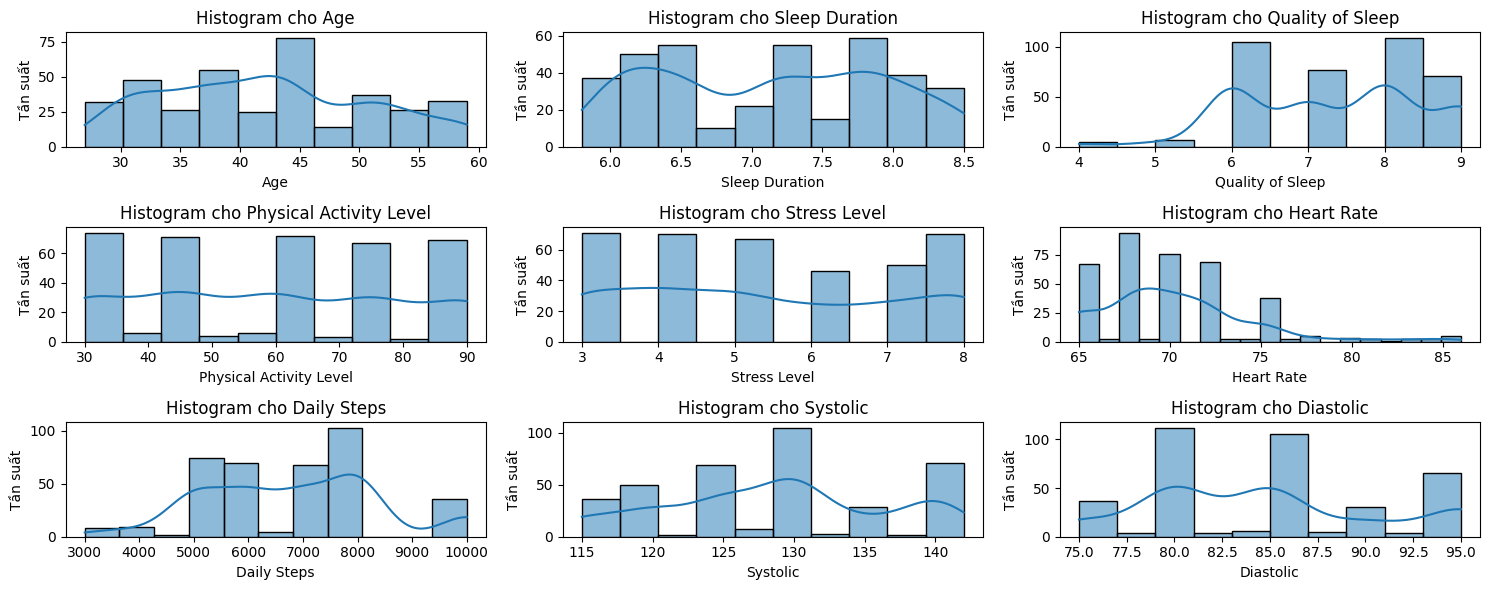

In [22]:
# Vẽ histogram và kde cho các biến số
histogram_selected_variables(df, numeric_cols)

### 2.2.2. Phân bố biến phân loại

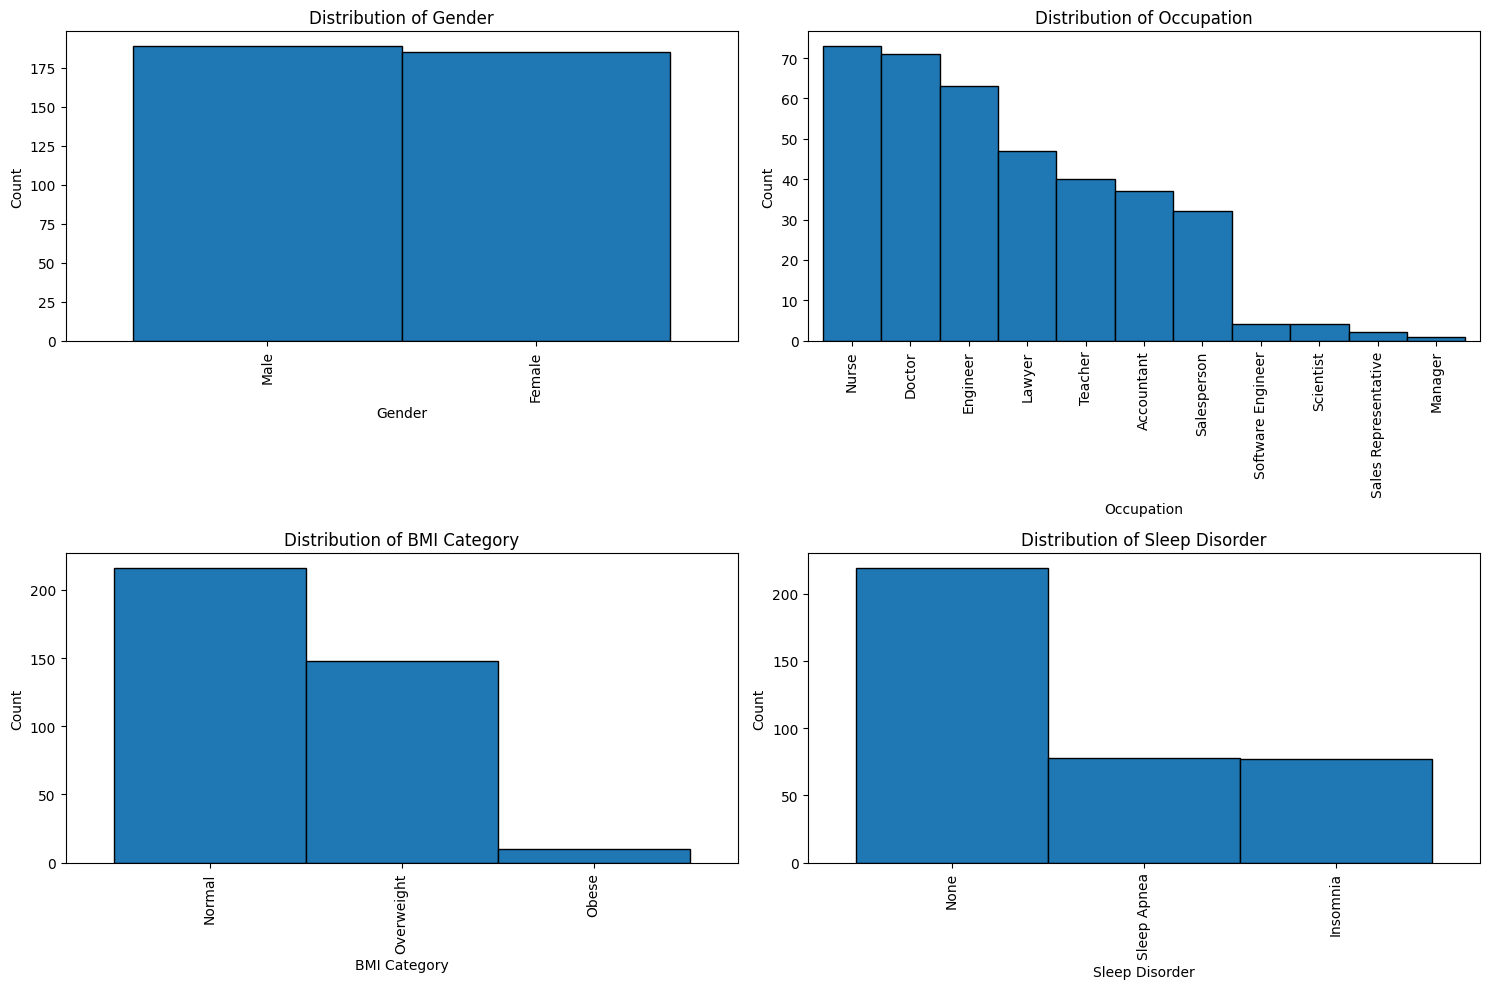

In [23]:
# Bar chart cho các biến phân loại

# Danh sách các biến phân loại 
categorical_columns = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']

# Tạo lưới để vẽ các biểu đồ trong cùng một khung hình
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Duyệt qua từng biến phân loại và tạo biểu đồ cột
for i, col in enumerate(categorical_columns):
    ax = axes[i // 2, i % 2]  # Xác định vị trí trong lưới
    df[col].value_counts().plot(kind='bar', ax=ax, width = 1.0, edgecolor='black')
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()


## 2.3. Mối quan hệ giữa các biến

### Ma trận tương quan giữa các biến số

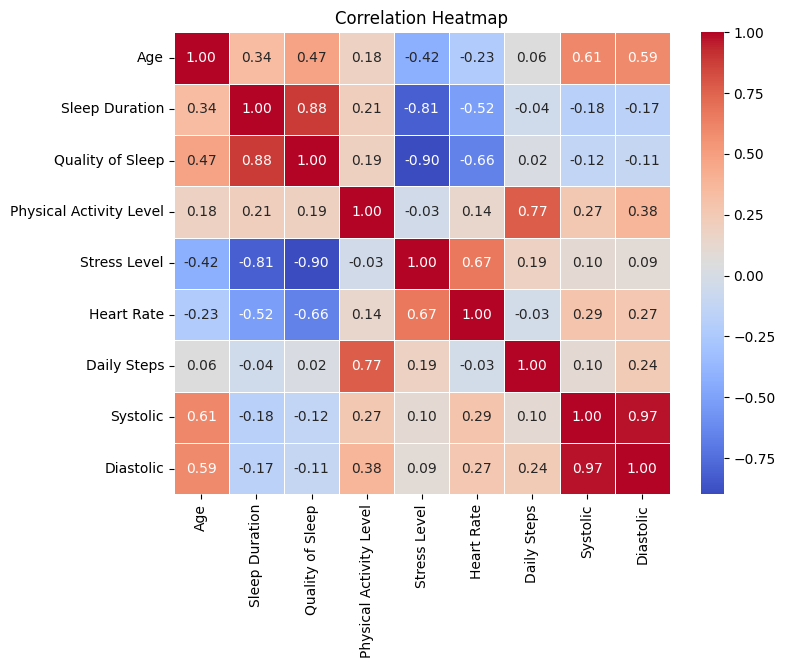

In [24]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Tính toán ma trận tương quan
correlation_matrix = numeric_df.corr()

# Vẽ heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### 2.3.1. Biến số với Stress Category


In [25]:
target_var = "Sleep Duration"

# Lấy danh sách các cột số (trừ cột mục tiêu)
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_columns = [col for col in numeric_columns if col != target_var]

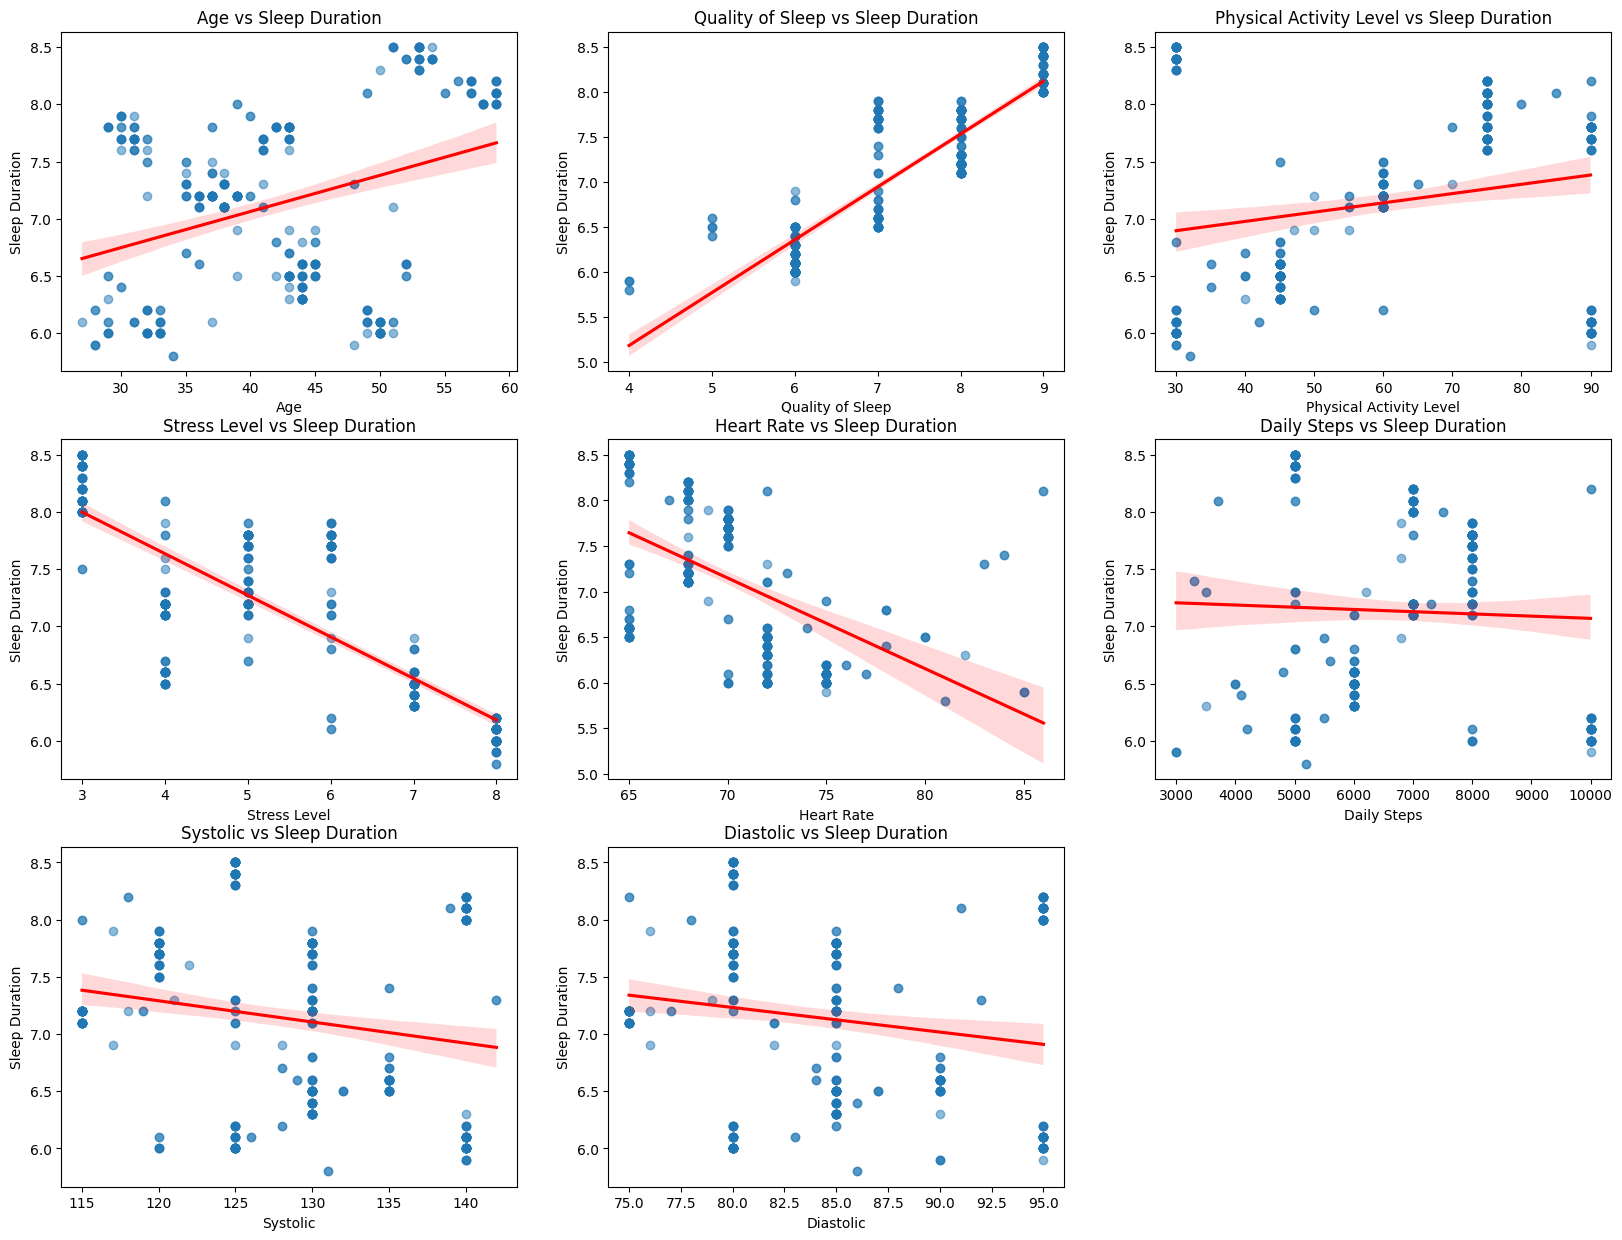

In [26]:
fig, axes = plt.subplots(len(numeric_columns) // 3 + 1, 3, figsize=(20, 5 * ((len(numeric_columns) + 3 - 1) // 3)))
for ax, col in zip(axes.flat, numeric_columns):
    sns.regplot(x=col, y=target_var, data=df, ax=ax, line_kws={"color": "red"}, scatter_kws={"alpha": 0.5})
    ax.set_title(f"{col} vs {target_var}")
for ax in axes.flat[len(numeric_columns):]:
    ax.axis('off')

In [27]:
import scipy.stats as stats

In [28]:
# Lọc các cột số (numeric columns) trừ cột giá
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_columns = [col for col in numeric_columns if col != target_var]

# Tạo một DataFrame để lưu kết quả
result_list = []

# Tính hệ số tương quan và p-value cho mỗi cột số với cột 'price'
for col in numeric_columns:
    correlation, p_value = stats.pearsonr(df[col], df[target_var])
    result_list.append({'Feature': col, 'Correlation': correlation, 'P-value': round(p_value,2)})

result = pd.DataFrame(result_list)
# In kết quả
print(result)


                   Feature  Correlation  P-value
0                      Age     0.344709     0.00
1         Quality of Sleep     0.883213     0.00
2  Physical Activity Level     0.212360     0.00
3             Stress Level    -0.811023     0.00
4               Heart Rate    -0.516455     0.00
5              Daily Steps    -0.039533     0.45
6                 Systolic    -0.180406     0.00
7                Diastolic    -0.166570     0.00


Các cột có tương quan mạnh với Sleep Duration: Quality of Sleep, Stress Level

Các cột có tương quan vừa với Stress Duration: Heart Rate

In [29]:
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    if df[col].nunique() <= 10:  # Chỉ kiểm tra các biến có ít nhóm
        f_statistic, p_value = stats.f_oneway(*[df[df[col] == category][target_var] for category in df[col].unique()])
        print(f"{col}: F-statistic = {f_statistic}, P-value = {round(p_value,2)}")

Gender: F-statistic = 5.581155779800991, P-value = 0.02
BMI Category: F-statistic = 31.001718690897327, P-value = 0.0
Sleep Disorder: F-statistic = 31.913467623717107, P-value = 0.0


Các cột có tương quan với Stress Level: BMI Category, Sleep Disorder, Gender

 => Sử dụng các cột Quality of Sleep, Stress Level, Heart Rate, BMI category, Sleep Disorder cho dự đoán Sleep Duration

# 3. Mô hình dự đoán

## Dùng hồi quy (Linear Regression) - Bài toán dự đoán

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X = df[["Stress Level", "Quality of Sleep", "Heart Rate", "BMI Category", "Sleep Disorder", "Gender"]]
y = df["Sleep Duration"]

# Chia dữ liệu thành tập train và test (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
numeric_features = ["Stress Level", "Quality of Sleep", "Heart Rate"]  
categorical_features = ["Gender","BMI Category", "Sleep Disorder"]

In [33]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [34]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

In [35]:
pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('model', LinearRegression())
])

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [37]:

# 5. Huấn luyện mô hình
pipeline.fit(X_train, y_train)

# 6. Dự đoán và đánh giá mô hình
y_train_pred = pipeline.predict(X_train)
y_pred = pipeline.predict(X_test)

print("train:")
mse = mean_squared_error(y_train, y_train_pred)
r2 = r2_score(y_train, y_train_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

print("test:")
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

train:
Mean Squared Error (MSE): 0.10296555612933563
R-squared (R2): 0.8303830211467196
test:
Mean Squared Error (MSE): 0.11421451344446266
R-squared (R2): 0.8336703342351937


c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


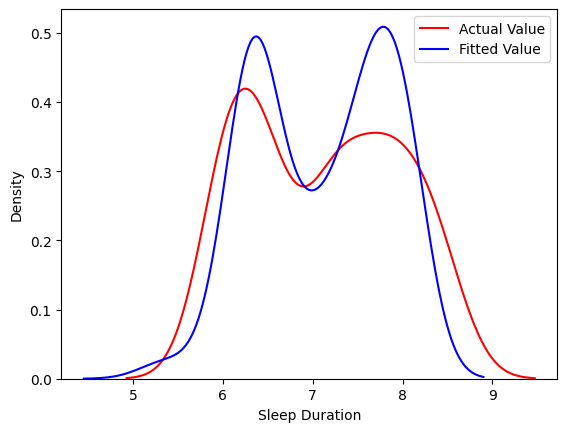

In [38]:
# Vẽ biểu đồ phân phối cho giá trị thực tế ('price')
sns.kdeplot(y_test, color="r", label="Actual Value")

# Vẽ đồ thị mật độ cho giá trị dự đoán
sns.kdeplot(y_pred, color="b", label="Fitted Value")

plt.legend()
plt.show()

## Dùng RandomForest Regressor - Bài toán dự đoán

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

pipeline_rf = Pipeline([
    ('preprocessing', preprocessor),
    ('model', RandomForestRegressor(n_estimators=10))
])


pipeline_rf.fit(X_train, y_train)

# 6. Dự đoán và đánh giá mô hình
y_train_pred = pipeline_rf.predict(X_train)
y_pred = pipeline_rf.predict(X_test)

print("train:")
mse = mean_squared_error(y_train, y_train_pred)
r2 = r2_score(y_train, y_train_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

print("test:")
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

train:
Mean Squared Error (MSE): 0.007633093676030395
R-squared (R2): 0.9874258699966999
test:
Mean Squared Error (MSE): 0.01460869283509468
R-squared (R2): 0.9787254795976209


c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


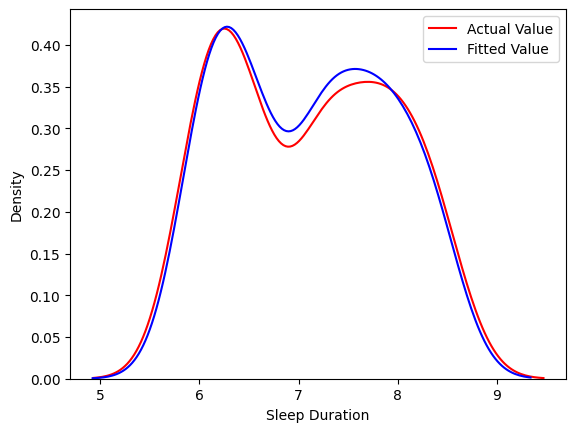

In [40]:
# Vẽ biểu đồ phân phối cho giá trị thực tế ('price')
sns.kdeplot(y_test, color="r", label="Actual Value")

# Vẽ đồ thị mật độ cho giá trị dự đoán
sns.kdeplot(y_pred, color="b", label="Fitted Value")

plt.legend()
plt.show()

## Dùng SGDRegressor

In [41]:
from sklearn.linear_model import SGDRegressor
# Khởi tạo SGDRegressor trong Pipeline
sgd = SGDRegressor(max_iter=1, tol=None, eta0=0.01, learning_rate='constant', warm_start=True, random_state=42)

sgd_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('regressor', sgd)
])

# Theo dõi MSE qua từng epoch
epochs = 50
train_mse_list = []
test_mse_list = []

for epoch in range(epochs):
    sgd_pipeline.fit(X_train, y_train)  # Huấn luyện qua từng epoch
    # Dự đoán và tính MSE
    y_train_pred = sgd_pipeline.predict(X_train)
    y_test_pred = sgd_pipeline.predict(X_test)
    train_mse_list.append(mean_squared_error(y_train, y_train_pred))
    test_mse_list.append(mean_squared_error(y_test, y_test_pred))



c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


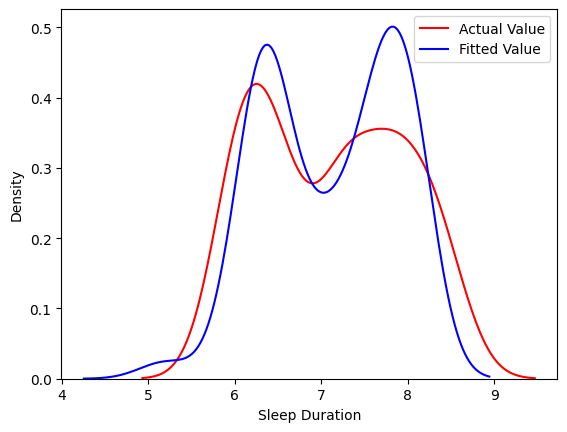

In [42]:
# Vẽ biểu đồ phân phối cho giá trị thực tế ('price')
sns.kdeplot(y_test, color="r", label="Actual Value")

# Vẽ đồ thị mật độ cho giá trị dự đoán
sns.kdeplot(y_test_pred, color="b", label="Fitted Value")

plt.legend()
plt.show()

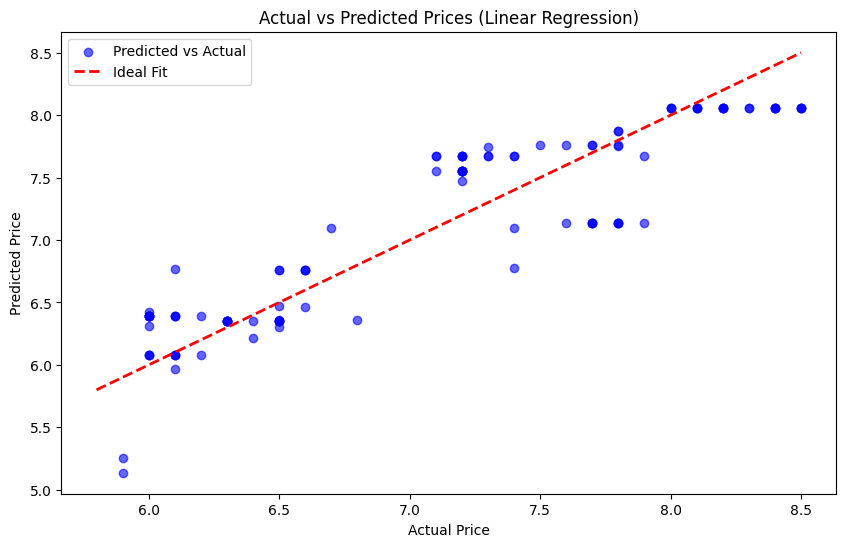

In [43]:
# Biểu đồ so sánh giá trị thực và giá trị dự đoán cho tập test
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.6, color="blue", label="Predicted vs Actual")
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', linewidth=2, label="Ideal Fit")  # Đường lý tưởng
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices (Linear Regression)')
plt.legend()
plt.show()

In [44]:
y_train_pred = sgd_pipeline.predict(X_train)
y_pred = sgd_pipeline.predict(X_test)

print("train:")
mse = mean_squared_error(y_train, y_train_pred)
r2 = r2_score(y_train, y_train_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

print("test:")
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

train:
Mean Squared Error (MSE): 0.10471429813946607
R-squared (R2): 0.8275022875528607
test:
Mean Squared Error (MSE): 0.11917327907453971
R-squared (R2): 0.8264489242323592


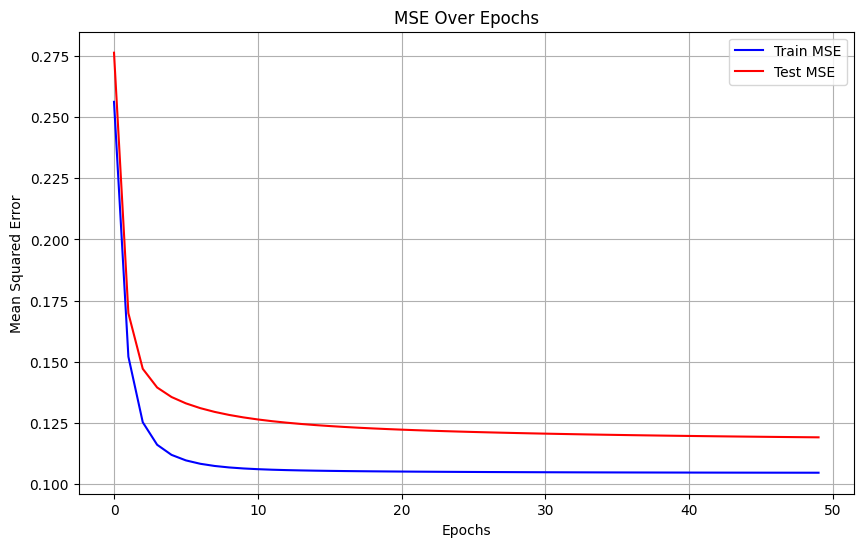

In [45]:
# Vẽ biểu đồ MSE qua Epochs
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(epochs), train_mse_list, label='Train MSE', color='blue')
plt.plot(range(epochs), test_mse_list, label='Test MSE', color='red')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('MSE Over Epochs')
plt.legend()
plt.grid(True)
plt.show()